[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 21, 21, 21, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 27, 27, 28, 28, 28, 30, 30, 30, 30, 32, 32, 32, 32, 35, 35, 35, 35, 36, 36, 40, 40, 40, 40, 40, 40, 42, 42, 42, 42, 42, 44, 45, 48, 48, 48, 54, 54, 56, 56, 60, 60, 63, 63, 70, 72, 72, 72, 72

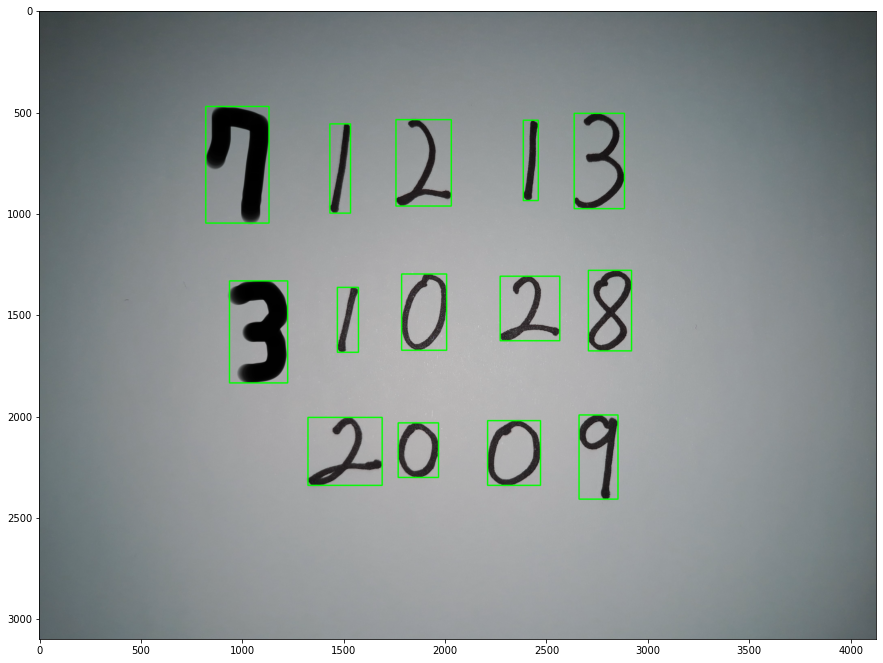

In [20]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

model_path = 'model/mnist_model.h5'
data_path ='mnist_data/100.jpeg'

model = tf.keras.models.load_model(model_path)

# model.summary()


img = cv2.imread(data_path)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

ret, img_th = cv2.threshold(img_blur, 100, 230, cv2.THRESH_BINARY_INV)

image, contours, hierachy= cv2.findContours(img_th.copy(), 
                                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(each) for each in contours]

tmp = [w*h for (x,y,w,h) in rects]
tmp.sort()

print(tmp)

rects = [(x,y,w,h) for (x,y,w,h) in rects if ((w*h>15000)and(w*h<500000))]


for rect in rects:
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

plt.figure(figsize=(15,12))
plt.imshow(img);